In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder


print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)
#
font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [62]:
accident = pd.read_csv('accident.csv')

In [63]:
accident.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2014010100100005,2014년 1월 1일 00시,수요일,서울특별시 구로구 오류동,부상신고사고,0,0,0,2,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,31세,상해없음,승용,남,65세,부상신고
1,2014010100100029,2014년 1월 1일 01시,수요일,서울특별시 성동구 마장동,중상사고,0,1,3,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,32세,상해없음,승용,남,54세,중상
2,2014010100100050,2014년 1월 1일 02시,수요일,서울특별시 광진구 광장동,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,...,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,여,26세,부상신고
3,2014010100100053,2014년 1월 1일 02시,수요일,서울특별시 구로구 개봉동,경상사고,0,0,2,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,남,25세,경상
4,2014010100100054,2014년 1월 1일 02시,수요일,서울특별시 양천구 목동,경상사고,0,0,2,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로안,승용,여,42세,상해없음,승용,남,37세,경상


In [64]:
accident.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [65]:
accident.drop(['사고번호', '시군구'], axis= 1)

,사고일시,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2014년 1월 1일 00시,수요일,부상신고사고,0,0,0,2,차대차 - 기타,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,31세,상해없음,승용,남,65세,부상신고
1,2014년 1월 1일 01시,수요일,중상사고,0,1,3,0,차대차 - 기타,안전운전불이행,기타,맑음,단일로 - 기타,승용,남,32세,상해없음,승용,남,54세,중상
2,2014년 1월 1일 02시,수요일,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,여,26세,부상신고
3,2014년 1월 1일 02시,수요일,경상사고,0,0,2,0,차대차 - 기타,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,남,25세,경상
4,2014년 1월 1일 02시,수요일,경상사고,0,0,2,0,차대차 - 측면직각충돌,기타,건조,맑음,교차로 - 교차로안,승용,여,42세,상해없음,승용,남,37세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26265,2023년 12월 30일 05시,토요일,경상사고,0,0,1,0,차대사람 - 차도통행중,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,31세,상해없음,보행자,여,81세 이상,경상
26266,2023년 12월 30일 13시,토요일,경상사고,0,0,1,0,차대차 - 정면충돌,중앙선침범,젖음/습기,눈,교차로 - 교차로부근,승용,남,63세,상해없음,화물,남,60세,경상
26267,2023년 12월 30일 13시,토요일,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,서리/결빙,눈,단일로 - 기타,승용,남,27세,상해없음,승용,남,59세,경상
26268,2023년 12월 31일 15시,일요일,경상사고,0,0,4,0,차대차 - 추돌,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,48세,상해없음,승용,남,37세,경상


In [53]:
df = accident[['사망자수', '중상자수', '경상자수', '부상신고자수', '노면상태']]


In [57]:
# MANOVA를 활용한 분석 실시.(다수의 수치형과 범주형을 비교 할 때 용이)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
# OLS 모델 생성
manova = MANOVA.from_formula('사망자수 + 중상자수 + 경상자수 + 부상신고자수 ~ 노면상태', data=df)
manova_results = manova.mv_test()

# 결과 출력
print(manova_results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.3528 4.0000 26258.0000 12042.5641 0.0000
         Pillai's trace 0.6472 4.0000 26258.0000 12042.5641 0.0000
 Hotelling-Lawley trace 1.8345 4.0000 26258.0000 12042.5641 0.0000
    Roy's greatest root 1.8345 4.0000 26258.0000 12042.5641 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
           노면상태          Value   Num DF    Den DF   F Value Pr > F
------------------------------------------------------------------
           Wilks' lambda 0.9979 32.0000  96836.3145  1.7152 0.0072
          Pillai

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


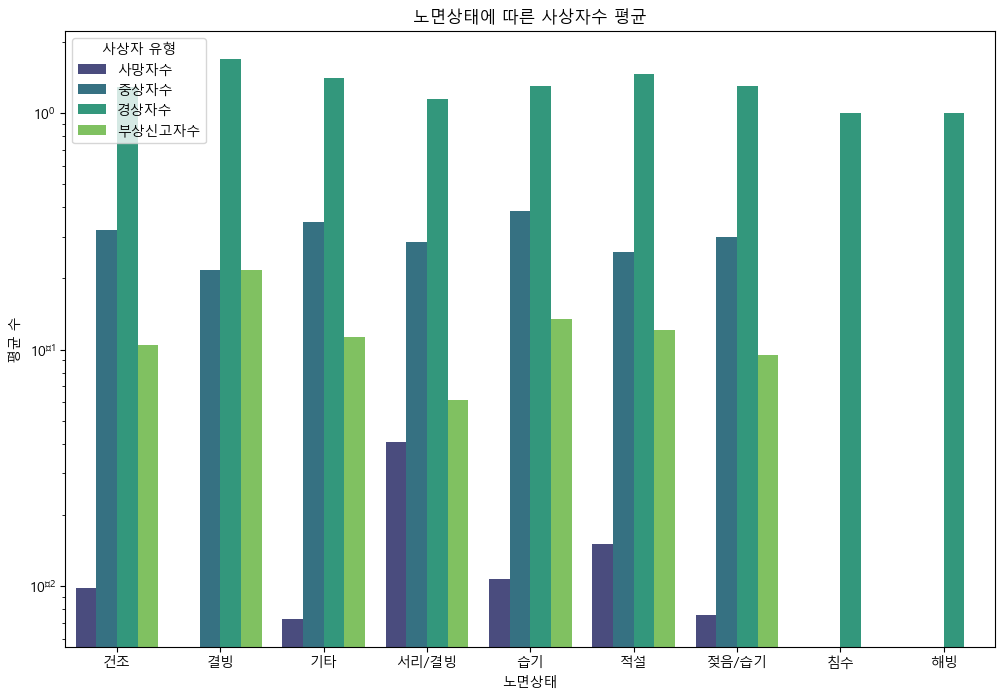

In [59]:
# 시각화 자료 비교, 일부 수치의 규모가 차이나서 로그스케일 적용
mean_scores = df.groupby('노면상태').mean().reset_index()

# 데이터프레임을 길게 변환
mean_scores_melted = mean_scores.melt(id_vars='노면상태', var_name='사상자 유형', value_name='평균 수')

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='노면상태', y='평균 수', hue='사상자 유형', data=mean_scores_melted, palette='viridis')
plt.yscale('log')
plt.title('노면상태에 따른 사상자수 평균')
plt.xlabel('노면상태')
plt.ylabel('평균 수')
plt.legend(title='사상자 유형')
plt.show()

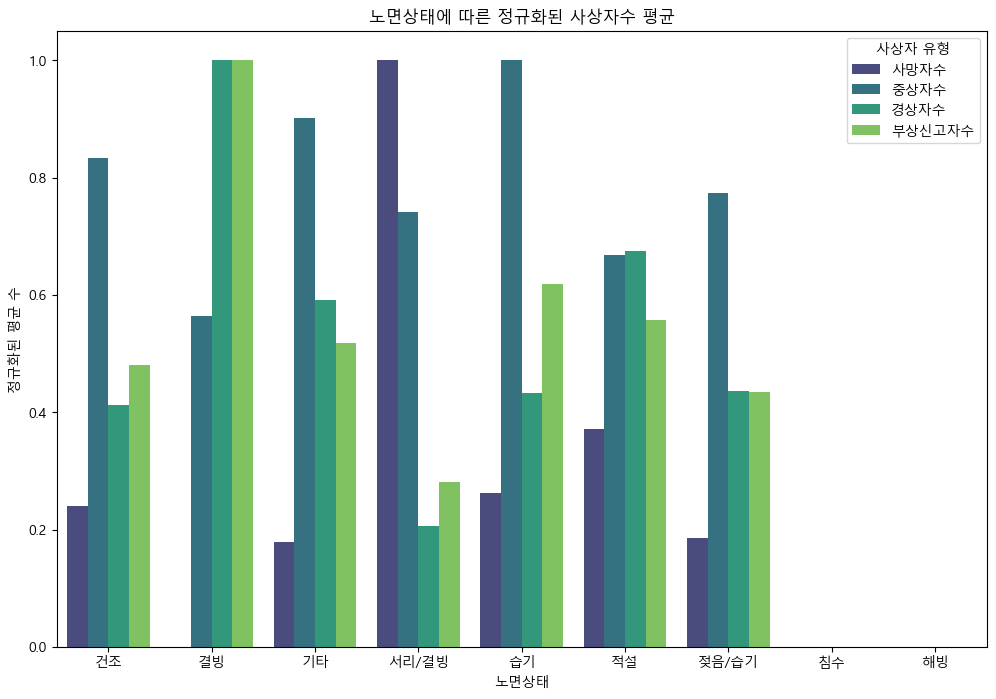

In [60]:
# 시각화 자료 비교, 일부 수치의 규모가 차이나서 정규화 실시 [0~1]로 수정하는 것.
from sklearn.preprocessing import MinMaxScaler

# 데이터 정규화
scaler = MinMaxScaler()
mean_scores_scaled = mean_scores.copy()
mean_scores_scaled[['사망자수', '중상자수', '경상자수', '부상신고자수']] = scaler.fit_transform(mean_scores[['사망자수', '중상자수', '경상자수', '부상신고자수']])

# 데이터프레임을 길게 변환
mean_scores_scaled_melted = mean_scores_scaled.melt(id_vars='노면상태', var_name='사상자 유형', value_name='정규화된 평균 수')

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='노면상태', y='정규화된 평균 수', hue='사상자 유형', data=mean_scores_scaled_melted, palette='viridis')
plt.title('노면상태에 따른 정규화된 사상자수 평균')
plt.xlabel('노면상태')
plt.ylabel('정규화된 평균 수')
plt.legend(title='사상자 유형')
plt.show()

C:\Users\medici\AppData\Local\Temp\ipykernel_33956\320723723.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='노면상태', y=var, data=mean_scores, ax=axes[row, col], palette='viridis')
C:\Users\medici\AppData\Local\Temp\ipykernel_33956\320723723.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='노면상태', y=var, data=mean_scores, ax=axes[row, col], palette='viridis')
C:\Users\medici\AppData\Local\Temp\ipykernel_33956\320723723.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='노면상태', y=var, data=mean_scores, ax=axes[row, col], palette=

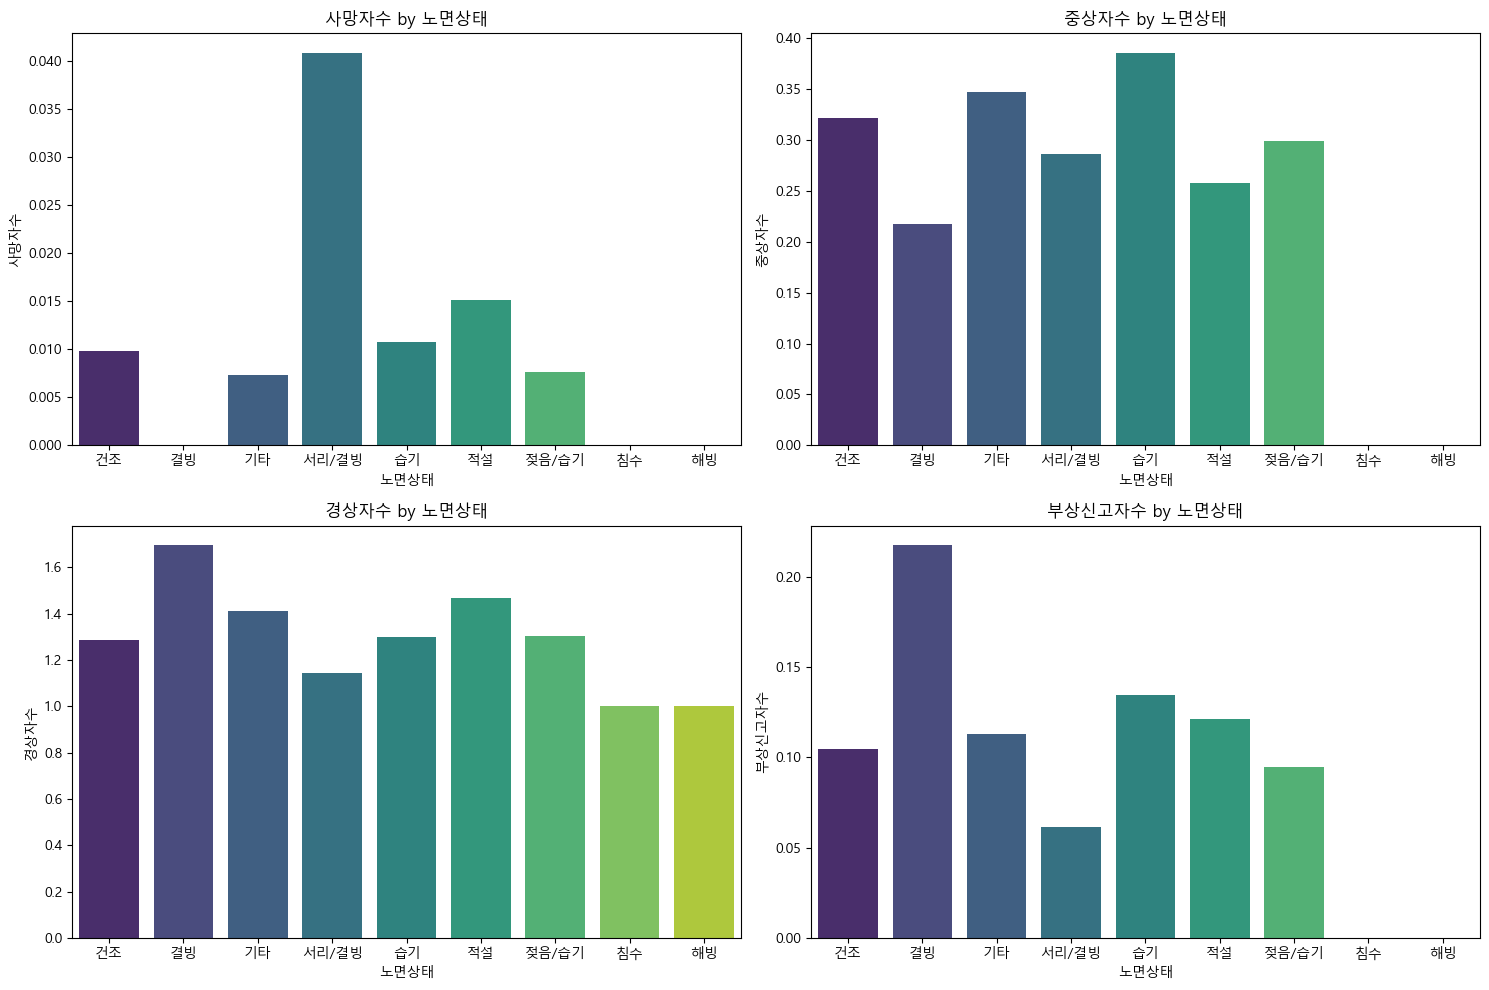

In [61]:
# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 각 변수에 대해 막대 그래프 그리기
variables = ['사망자수', '중상자수', '경상자수', '부상신고자수']
for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    sns.barplot(x='노면상태', y=var, data=mean_scores, ax=axes[row, col], palette='viridis')
    axes[row, col].set_title(f'{var} by 노면상태')
    axes[row, col].set_xlabel('노면상태')
    axes[row, col].set_ylabel(var)

plt.tight_layout()
plt.show()
